In [4]:
%matplotlib inline

In [2]:
# Generate example data
import random
import numpy as np
import matplotlib.pyplot as plt
# 5000 points gaussian distributed in a circle of radius '20'
n1 = 5000
mu, sigma = 0, 10
r = np.random.uniform(mu,sigma, size=n1)
theta = np.random.uniform(low=0,high=2*np.pi, size=n1)
data = data_xs, data_ys = r * np.cos(theta), r * np.sin(theta)

# second 'arc' of points to also cluster
n2 = n1//20
mu1, sigma1 = 1, 30
r1 = np.random.uniform(low=50, high=60, size=n2)
theta1 = np.random.uniform(low=1.5, high=2.0,size=n2)
data1 = data1_xs, data1_ys = r1 * np.cos(theta1), r1 * np.sin(theta1)

# uniform distributed "noise"
n3 = n1//10
noise_min, noise_max = mu-6*sigma, mu+6*sigma
noise = noise_xs, noise_ys = np.random.uniform(low=noise_min, high=noise_max, size=n3), np.random.uniform(low=noise_min, high=noise_max, size=n3)

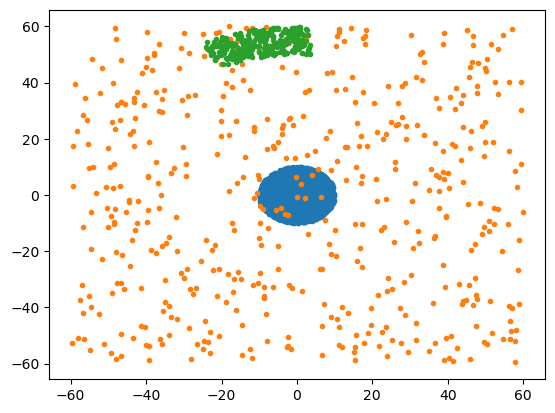

In [3]:
plt.plot(data_xs,data_ys, '.', color='C0')
plt.plot(noise_xs,noise_ys, '.', color='C1')
plt.plot(data1_xs,data1_ys, '.', color='C2')

In [4]:
from sklearn.cluster import DBSCAN
# DBSCAN.fit%matplotlib inline expects a an array where each entry is a "point"
X = []
for (x,y) in zip(data_xs, data_ys):
    X.append([x,y])

for (x,y) in zip(data1_xs, data1_ys):
    X.append([x,y])

for (x,y) in zip(noise_xs, noise_ys):
    X.append([x,y])


X = np.array(X)

In [23]:
print(len(X) == n1+n2+n3)

True


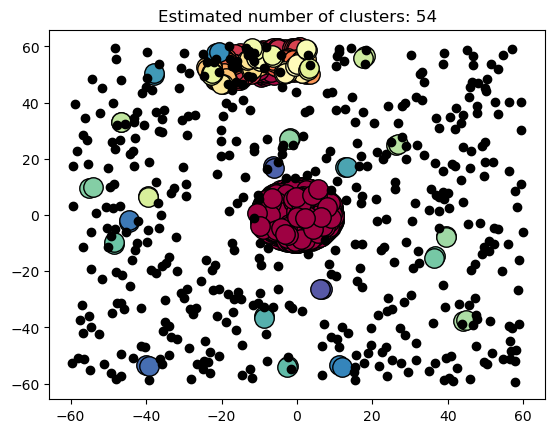

In [5]:
db = DBSCAN(eps=1, min_samples=2).fit(X)
labels = db.labels_
#print(len(X), len(labels), len(core_samples_mask))

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {len(unique_labels)}")
plt.show()

In [6]:
import uproot

file = uproot.open("../ntuple/user.scheong.42871997.Output._000031.SuperNtuple.root")
tree = file["ntuple"]  # or file["path/to/tree"]

branches = tree.arrays(['Track_time', 'Track_timeRes', 'RecoVtx_z', 'TruthVtx_z', 'Track_z0', 'Track_var_z0', 'Track_hasValidTime'])
event_num = 204

HS_indices = [1087, 4, 72, 664, 673, 749, 849, 1014, 1017, 1075, 1121, 1193, 1244, 1264, 1417, 1487, 1513, 1566, 1640, 1680, 1716, 1224, 1740, 1713, 784, 1570, 1720]
times = []
for trk in HS_indices:
    reco_z = branches.RecoVtx_z[event_num][0];
    z0 = branches.Track_z0[event_num][trk];
    significance = np.abs((z0 - reco_z) / np.sqrt(branches.Track_var_z0[event_num][trk]))
    if significance < 3.0:
        if branches.Track_hasValidTime[event_num][trk] == 1:
            times.append([branches.Track_time[event_num][trk],branches.Track_timeRes[event_num][trk]])

print(times)

[[np.float32(-85.31284), np.float32(35.0)], [np.float32(-146.71898), np.float32(24.748737)], [np.float32(-162.79984), np.float32(24.748737)], [np.float32(-168.69116), np.float32(24.748737)], [np.float32(-185.0586), np.float32(35.0)], [np.float32(-76.84517), np.float32(24.748737)], [np.float32(-132.38303), np.float32(20.20726)], [np.float32(-145.54596), np.float32(24.748737)], [np.float32(-88.35411), np.float32(35.0)], [np.float32(-131.80685), np.float32(24.748737)], [np.float32(-147.32074), np.float32(35.0)], [np.float32(-19.536495), np.float32(24.748737)], [np.float32(-92.91077), np.float32(24.748737)], [np.float32(-128.1848), np.float32(24.748737)], [np.float32(-140.93065), np.float32(24.748737)], [np.float32(-129.39294), np.float32(20.20726)], [np.float32(-135.3569), np.float32(35.0)], [np.float32(-178.28894), np.float32(24.748737)], [np.float32(-35.891533), np.float32(24.748737)], [np.float32(-201.74742), np.float32(24.748737)], [np.float32(-37.303925), np.float32(35.0)], [np.float

27
27


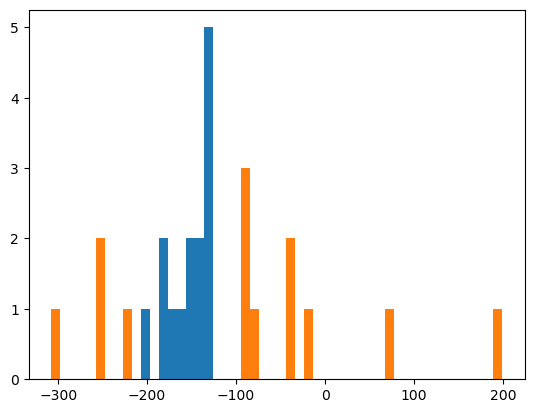

In [10]:
#plt.hist(times, 50)
#reshaped_times = np.array(times).reshape(-1, 1)
def metricfun(x):

timehist = DBSCAN(eps=30,min_samples=5).fit(times)
cluster_labels = timehist.labels_
unique_labels  = set(cluster_labels)
core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
core_samples_mask[timehist.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

print(len(times))
print(len(timehist.labels_))
clusters = {x:[] for x in unique_labels}
for (time,label) in zip(times,cluster_labels):
    clusters[label].append(time[0])

plt.hist(clusters.values(), bins=50, stacked=True);